<a href="https://colab.research.google.com/github/horsinnaround/learninggit/blob/main/work_21_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path = '/content/drive/MyDrive/New work 1 complient/'
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.models import Sequential
from keras.layers import *
import seaborn as sns
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Flatten, Dense,Conv1D,GlobalAveragePooling1D,Dropout,MaxPooling1D,ConvLSTM1D,LSTM
sns.set_context('notebook')
sns.set_theme(style="whitegrid")
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, jaccard_score

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# data stuff

In [4]:
data = pd.read_csv('/content/drive/MyDrive/New work 1 complient/data.csv')

In [5]:
data['Product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    568977
Debt collection                                                                 197386
Mortgage                                                                        100087
Credit card or prepaid card                                                      86374
Checking or savings account                                                      58289
Student loan                                                                     33849
Name: Product, dtype: int64

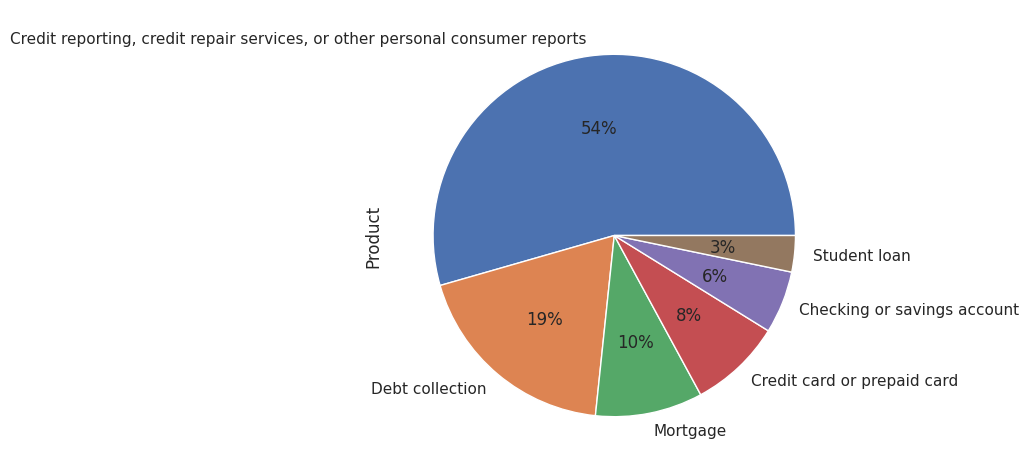

In [6]:
data['Product'].value_counts().plot.pie( legend=False, \
                   autopct='%1.0f%%')
plt.savefig(f"{path}pie_chart.png",bbox_inches='tight')

In [7]:
di = dict(data['Product'].value_counts())
dt = pd.DataFrame.from_dict(di, orient='index', dtype=None,columns=['number'])
dt['Product'] = dt.index
dt.to_csv(f"{path}pie_chart.csv",index=False)

# preprocessing

In [8]:
dt = data.sample(frac=0.1,random_state = 56)

In [9]:
dt

,Product,Consumer complaint narrative
272257,"Credit reporting, credit repair services, or o...","These can be combined On my credit report, you..."
614077,"Credit reporting, credit repair services, or o...",I filed a dispute with XXXX on behalf of numbe...
101231,"Credit reporting, credit repair services, or o...",On XX/XX/2022 Equifax received a certified let...
150242,"Credit reporting, credit repair services, or o...",This is XXXX XXXX who is submitting this CFPB ...
672197,"Credit reporting, credit repair services, or o...",In XX/XX/XXXX or XX/XX/XXXX Ditech Mortgage Co...
...,...,...
218380,"Credit reporting, credit repair services, or o...",Please take a look at the attached letters and...
791733,"Credit reporting, credit repair services, or o...",I have had the same XXXX student loans repor...
685086,Mortgage,My problem I am trying to take off the PMI. I ...
14452,"Credit reporting, credit repair services, or o...","I am a natural person, I am a living human bei..."


In [10]:
dt.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [11]:
# d5 = data['Consumer complaint narrative'][800000:-1].str.split().apply(len)

In [12]:
# d6 = pd.concat([d1,d2,d3,d4,d5])

In [13]:
d6 = dt['Consumer complaint narrative'].str.split().apply(len)

dt['length'] = d6
dt['length'].max()


5613

In [294]:
dt[['Product','Class','length']].to_csv(f'{path}prosuct_class.csv',index=False)

In [14]:
maxlen = 500
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(dt['Consumer complaint narrative'])
Xsequences = tokenizer.texts_to_sequences(dt['Consumer complaint narrative'])
# xsequences = tokenizer.texts_to_sequences(test.OriginalTweet)

In [15]:
trainpadded = pad_sequences(Xsequences, maxlen=maxlen)

In [17]:
embedding_dim = 50

In [18]:
dt['Class'] = dt['Product'].factorize()[0]

In [19]:
X,x,Y,y = train_test_split(trainpadded,dt['Class'],test_size=0.25)
X.shape,x.shape,Y.shape,y.shape

((78372, 500), (26124, 500), (78372,), (26124,))

In [20]:
import numpy as np
# One hot encoding test labels
b = np.zeros((y.size, y.max() + 1))
b[np.arange(y.size), y] = 1
y = b
# One hot encoding train labels
b = np.zeros((Y.size, Y.max() + 1))
b[np.arange(Y.size), Y] = 1
Y = b

In [21]:
Y.shape

(78372, 6)

In [106]:
met = np.zeros((5,5))

In [198]:
k = met[4]
namemodel = 'ConvLSTM'

In [199]:
met

array([[0.8647604 , 0.83888376, 0.88757038, 0.90881562, 0.88398033],
       [0.83873069, 0.78762823, 0.88097274, 0.88317257, 0.85987127],
       [0.74709082, 0.61969835, 0.87579119, 0.80106026, 0.7855708 ],
       [0.84018528, 0.79838461, 0.87885553, 0.88818717, 0.86056137],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [200]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense,Conv1D,GlobalAveragePooling1D,Dropout,MaxPooling1D,ConvLSTM1D,LSTM,GlobalMaxPooling1D,Bidirectional
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
# model.add(ConvLSTM1D(32, 2, activation='relu'))
# model.add(LSTM(32,return_sequences=True ))

# model.add(LSTM(100,return_sequences=True ))
# model.add(LSTM(100))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(Conv1D(filters=16, kernel_size=2, padding='same', activation='relu'))
# model.add(Conv1D(filters=8, kernel_size=2, padding='same', activation='relu'))

model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
# model.add(MaxPooling1D(2))
# model.add(Conv1D(48, 2, activation='relu'))
# model.add(MaxPooling1D(2))
# model.add(Conv1D(128, 2, activation='relu'))
# model.add(Flatten())
# model.add(GlobalMaxPooling1D())
# model.add(Dense(32, activation='relu',kernel_regularizer = tf.keras.regularizers.L2(0.0001)))
# model.add(Dense(24, activation='relu',kernel_regularizer = tf.keras.regularizers.L2(0.0001)))

# model.add(Dropout(0.3))
model.add(Dense(64, activation='relu',kernel_regularizer = tf.keras.regularizers.L2(0.0001)))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 500, 50)           250000    
                                                                 
 conv1d_33 (Conv1D)          (None, 500, 32)           3232      
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 250, 32)          0         
 g1D)                                                            
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_44 (Dense)            (None, 64)                4160      
                                                                 
 dropout_36 (Dropout)        (None, 64)              

In [201]:
num_epochs =14
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X,
                    Y,
                    batch_size=32,
                    epochs=num_epochs, 
                    validation_split=0.2,
                    # validation_data=[x,y],
                    callbacks =[early_stop],
                    # verbose=0
                    )
y_test = model.predict(x)


Epoch 1/14
1960/1960 [==============================] - 80s 38ms/step - loss: 0.8435 - accuracy: 0.7012 - val_loss: 0.6528 - val_accuracy: 0.7770
Epoch 2/14
1960/1960 [==============================] - 51s 26ms/step - loss: 0.6135 - accuracy: 0.7979 - val_loss: 0.5718 - val_accuracy: 0.8078
Epoch 3/14
1960/1960 [==============================] - 49s 25ms/step - loss: 0.5283 - accuracy: 0.8340 - val_loss: 0.4686 - val_accuracy: 0.8471
Epoch 4/14
1960/1960 [==============================] - 50s 25ms/step - loss: 0.4675 - accuracy: 0.8592 - val_loss: 0.4490 - val_accuracy: 0.8656
Epoch 5/14
1960/1960 [==============================] - 48s 25ms/step - loss: 0.4314 - accuracy: 0.8702 - val_loss: 0.4371 - val_accuracy: 0.8599
Epoch 6/14
1960/1960 [==============================] - 49s 25ms/step - loss: 0.4137 - accuracy: 0.8751 - val_loss: 0.4290 - val_accuracy: 0.8692
Epoch 7/14
1960/1960 [==============================] - 49s 25ms/step - loss: 0.3965 - accuracy: 0.8800 - val_loss: 0.4250 -

In [202]:
m = tf.keras.metrics.CategoricalAccuracy()
m.update_state(y, y_test)
k[0] = m.result().numpy()

m = tf.keras.metrics.Recall()
m.update_state(y, y_test)
k[1] = m.result().numpy()

m = tf.keras.metrics.Precision()
m.update_state(y, y_test)
k[2] = m.result().numpy()

m = tf.keras.metrics.AUC(num_thresholds=3)
m.update_state(y, y_test)
k[3] = m.result().numpy()

m = tf.keras.metrics.CosineSimilarity(axis=1)
m.update_state(y, y_test)
k[4] = m.result().numpy()

In [210]:
met[3] = [0.84018528, 0.79838461, 0.87885553, 0.88818717, 0.86056137] 
# k
met

array([[0.8647604 , 0.83888376, 0.88757038, 0.90881562, 0.88398033],
       [0.83873069, 0.78762823, 0.88097274, 0.88317257, 0.85987127],
       [0.74709082, 0.61969835, 0.87579119, 0.80106026, 0.7855708 ],
       [0.84018528, 0.79838461, 0.87885553, 0.88818717, 0.86056137],
       [0.88060784, 0.86426276, 0.89499348, 0.92199135, 0.89648521]])

In [211]:
modelnames = ['1Conv1d','2Conv1d','3Conv1d','LSTM','ConvLSTM']
df = pd.DataFrame(met,columns=['accuracy','recall','precision','auc','cosinsimilarity'])
df['Model'] = modelnames

In [213]:
df.to_csv(f'{path}results.csv',index=False)

In [205]:
l = np.linspace(0,0.988)
l

array([0.        , 0.02016327, 0.04032653, 0.0604898 , 0.08065306,
       0.10081633, 0.12097959, 0.14114286, 0.16130612, 0.18146939,
       0.20163265, 0.22179592, 0.24195918, 0.26212245, 0.28228571,
       0.30244898, 0.32261224, 0.34277551, 0.36293878, 0.38310204,
       0.40326531, 0.42342857, 0.44359184, 0.4637551 , 0.48391837,
       0.50408163, 0.5242449 , 0.54440816, 0.56457143, 0.58473469,
       0.60489796, 0.62506122, 0.64522449, 0.66538776, 0.68555102,
       0.70571429, 0.72587755, 0.74604082, 0.76620408, 0.78636735,
       0.80653061, 0.82669388, 0.84685714, 0.86702041, 0.88718367,
       0.90734694, 0.9275102 , 0.94767347, 0.96783673, 0.988     ])

In [206]:
ll = np.zeros((l.shape[0],2))
ll[:,0] = l

In [207]:
for j,i in enumerate(l):
  m = tf.keras.metrics.PrecisionAtRecall(i)
  m.update_state(y, y_test)
  ll[j][1] = m.result().numpy()
  # print(i,m.result().numpy())


In [208]:
p = pd.DataFrame(ll,columns=('Recall','Precision'))

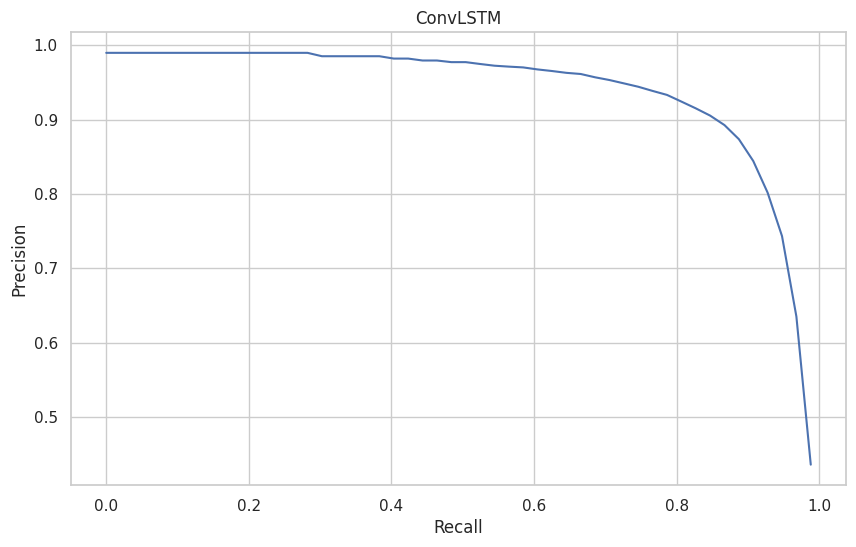

In [209]:
plt.plot(ll[:,0],ll[:,1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title(f"{namemodel}")
plt.savefig(f'{path}Precisionatrecall_{namemodel}.png',bbox_inches='tight')
p.to_csv(f'{path}Precisionatrecall_{namemodel}.csv',index=False)

In [ ]:
# Variable-length int sequences.
query_input = tf.keras.Input(shape=(None,), dtype='int32')
value_input = tf.keras.Input(shape=(None,), dtype='int32')

# Embedding lookup.
token_embedding = tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen)
# Query embeddings of shape [batch_size, Tq, dimension].
query_embeddings = token_embedding(query_input)
# Value embeddings of shape [batch_size, Tv, dimension].
value_embeddings = token_embedding(value_input)

# CNN layer.
cnn_layer = tf.keras.layers.Conv1D(
    filters=100,
    kernel_size=4,
    # Use 'same' padding so outputs have the same shape as inputs.
    padding='same')
# Query encoding of shape [batch_size, Tq, filters].
query_seq_encoding = cnn_layer(query_embeddings)
# Value encoding of shape [batch_size, Tv, filters].
value_seq_encoding = cnn_layer(value_embeddings)

# Query-value attention of shape [batch_size, Tq, filters].
query_value_attention_seq = tf.keras.layers.Attention()(
    [query_seq_encoding, value_seq_encoding])

# Reduce over the sequence axis to produce encodings of shape
# [batch_size, filters].
query_encoding = tf.keras.layers.GlobalAveragePooling1D()(
    query_seq_encoding)
query_value_attention = tf.keras.layers.GlobalAveragePooling1D()(
    query_value_attention_seq)

# Concatenate query and document encodings to produce a DNN input layer.
input_layer = tf.keras.layers.Concatenate()(
    [query_encoding, query_value_attention])

# Add DNN layers, and create Model.
# ...

In [215]:
df.index = df.Model

In [216]:
dh = df.drop('Model',axis=1)

In [217]:
dh

,accuracy,recall,precision,auc,cosinsimilarity
Model,,,,,
1Conv1d,0.864760,0.838884,0.887570,0.908816,0.883980
2Conv1d,0.838731,0.787628,0.880973,0.883173,0.859871
3Conv1d,0.747091,0.619698,0.875791,0.801060,0.785571
LSTM,0.840185,0.798385,0.878856,0.888187,0.860561
ConvLSTM,0.880608,0.864263,0.894993,0.921991,0.896485


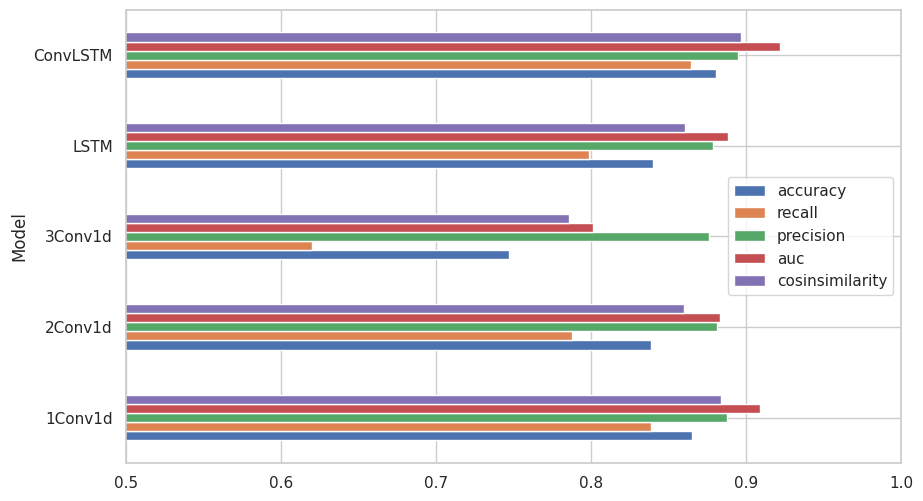

In [221]:
dh.plot(kind='barh')
plt.xlim(0.5,1)
plt.savefig(f'{path}results1.png',bbox_inches='tight')

In [222]:
dh

,accuracy,recall,precision,auc,cosinsimilarity
Model,,,,,
1Conv1d,0.864760,0.838884,0.887570,0.908816,0.883980
2Conv1d,0.838731,0.787628,0.880973,0.883173,0.859871
3Conv1d,0.747091,0.619698,0.875791,0.801060,0.785571
LSTM,0.840185,0.798385,0.878856,0.888187,0.860561
ConvLSTM,0.880608,0.864263,0.894993,0.921991,0.896485


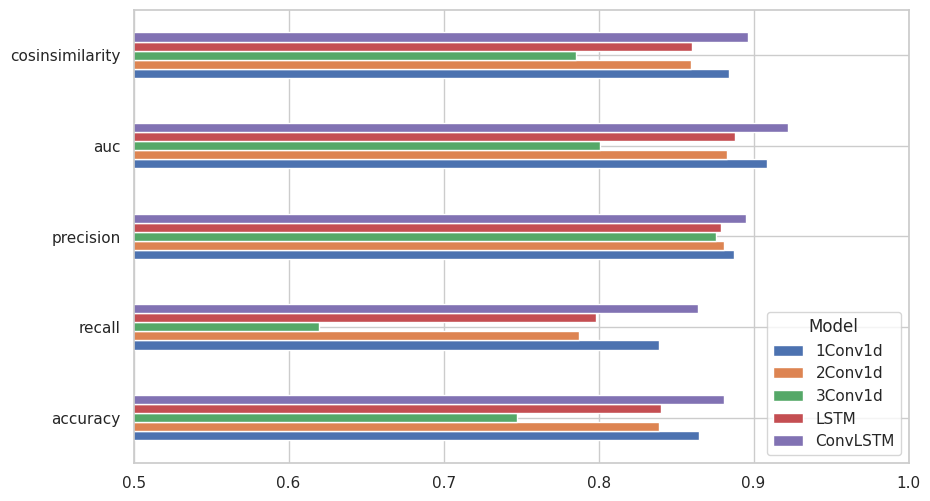

In [225]:
dh.T.plot(kind='barh')
plt.xlim(0.5,1)
plt.savefig(f'{path}results2.png',bbox_inches='tight')

In [226]:
dh

,accuracy,recall,precision,auc,cosinsimilarity
Model,,,,,
1Conv1d,0.864760,0.838884,0.887570,0.908816,0.883980
2Conv1d,0.838731,0.787628,0.880973,0.883173,0.859871
3Conv1d,0.747091,0.619698,0.875791,0.801060,0.785571
LSTM,0.840185,0.798385,0.878856,0.888187,0.860561
ConvLSTM,0.880608,0.864263,0.894993,0.921991,0.896485


In [237]:
k1 = pd.concat([df['accuracy'],df['precision'],df['recall'],df['auc']])
k1

Model
1Conv1d     0.864760
2Conv1d     0.838731
3Conv1d     0.747091
LSTM        0.840185
ConvLSTM    0.880608
1Conv1d     0.887570
2Conv1d     0.880973
3Conv1d     0.875791
LSTM        0.878856
ConvLSTM    0.894993
1Conv1d     0.838884
2Conv1d     0.787628
3Conv1d     0.619698
LSTM        0.798385
ConvLSTM    0.864263
1Conv1d     0.908816
2Conv1d     0.883173
3Conv1d     0.801060
LSTM        0.888187
ConvLSTM    0.921991
dtype: float64

In [239]:
k1.index

Index(['1Conv1d', '2Conv1d', '3Conv1d', 'LSTM', 'ConvLSTM', '1Conv1d',
       '2Conv1d', '3Conv1d', 'LSTM', 'ConvLSTM', '1Conv1d', '2Conv1d',
       '3Conv1d', 'LSTM', 'ConvLSTM', '1Conv1d', '2Conv1d', '3Conv1d', 'LSTM',
       'ConvLSTM'],
      dtype='object', name='Model')

In [ ]:
k2 = pd.DataFrame(k1,columns=['metric'])
k2

In [243]:
k2['Model'] = k2.index

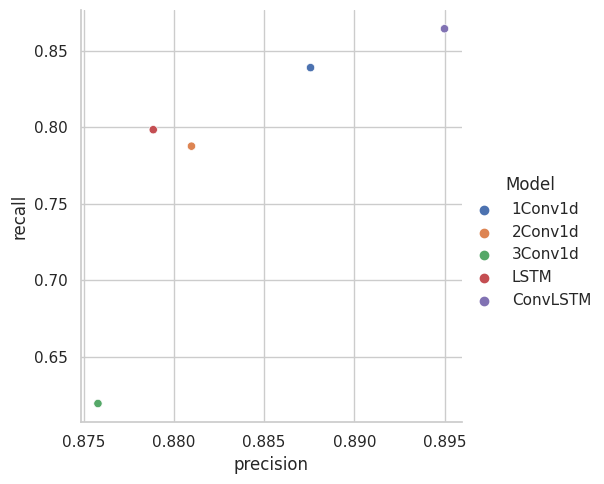

In [229]:
sns.relplot(
    data=df,
    x="precision", y="recall",
    hue="Model"
)
plt.savefig(f'{path}results3.png',bbox_inches='tight')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


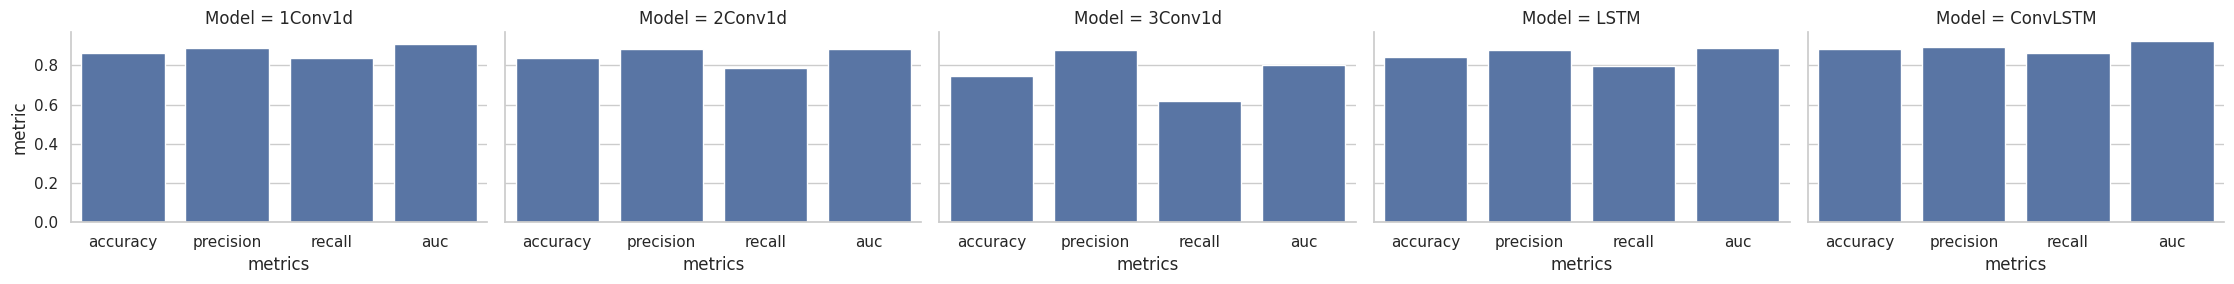

In [265]:
g = sns.FacetGrid(k2, col="Model", aspect=1.5)
g.map(sns.barplot,'metrics','metric')

In [256]:
k2['metrics'] = ['accuracy','accuracy','accuracy','accuracy','accuracy',
                 'precision','precision','precision','precision','precision','recall','recall','recall','recall','recall','auc','auc','auc','auc','auc']

In [280]:
k2['values'] = k2['metric']

In [281]:
k2['metric'] = k2['metrics']

In [282]:
k2.drop('metrics',axis=1,inplace=True)

In [ ]:
df

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


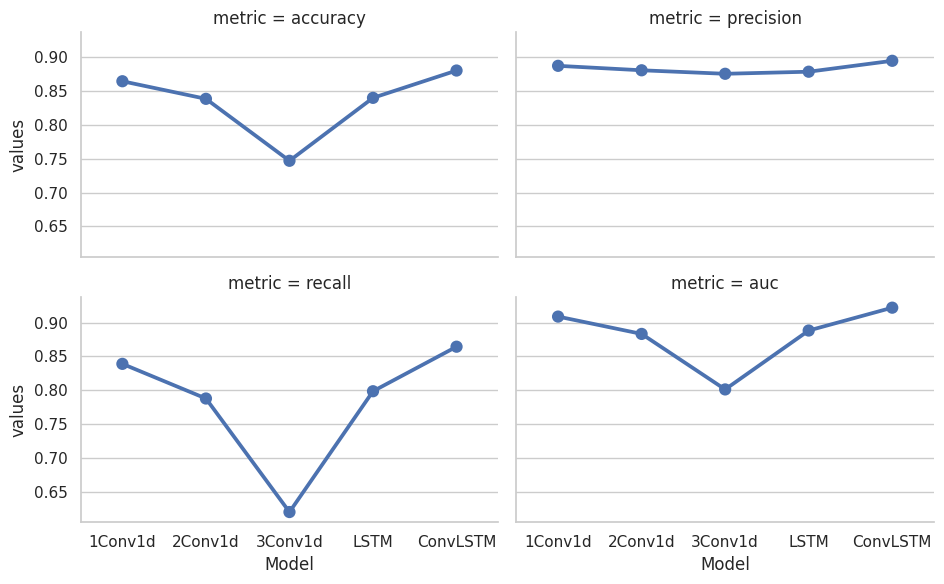

In [286]:
g = sns.FacetGrid(k2, col="metric", col_wrap=2, height=3,aspect=1.6)
g.map(sns.pointplot, "Model", "values")
plt.savefig(f'{path}metrics.png',bbox_inches='tight')
k2.to_csv(f'{path}metrics.csv',index=False)

In [287]:
y, y_test

(array([[0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0.],
        ...,
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.]]),
 array([[2.1174781e-03, 4.4708699e-07, 1.4589631e-02, 9.8236022e-05,
         9.8315609e-01, 3.8043065e-05],
        [1.7011225e-01, 1.4815509e-01, 4.4358182e-01, 1.4035979e-02,
         2.5026942e-02, 1.9908787e-01],
        [9.9942315e-01, 1.1748839e-05, 5.6491210e-04, 3.4673342e-08,
         1.3836163e-07, 3.7874819e-09],
        ...,
        [9.9949419e-01, 3.7578825e-06, 5.0172547e-04, 1.8373061e-08,
         2.6393437e-07, 2.7576221e-09],
        [4.5687187e-01, 4.5388814e-02, 4.7972628e-01, 1.5564996e-02,
         1.4185827e-03, 1.0293800e-03],
        [9.9957043e-01, 1.1134611e-05, 4.1850327e-04, 2.4810658e-09,
         3.5804228e-09, 6.7211570e-10]], dtype=float32))

In [290]:
pd.DataFrame(y_test,columns=["1",'2','3','4','5','6']).to_csv(f'{path}y_test.csv',index=False)